# Uberwala Dekh Raha Hain

I logged Uber prices from my home to the school I teach at regular intervals over a day to figure out the timings during which Uber charges the least, and decided to test matplotlib on it. It's nothing that can't be done in excel, but it's a fun way to familiarise oneself with matplotlib.

In [103]:
from datetime import datetime
from dateutil.parser import parse
import pandas as pd
from datascience import *
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as md
%matplotlib inline
plt.style.use('fivethirtyeight')

In [104]:
uber_data = Table().read_table('uber_data.csv')
uber_data

Time,uberPOOL,uberGO,uberX
9:28,129.53,258.45,278.25
10:00,119.53,243.64,262.38
10:31,109.53,218.39,235.79
10:59,79.53,167.81,181.82
11:33,99.53,175.36,191.15
11:59,99.53,175.02,191.3
12:34,109.53,167.95,182.75
13:02,109.53,164.75,179.41
13:30,109.53,161.62,177.06
14:00,99.53,154.65,170.45


In [105]:
uber_data[0]

array(['9:28', '10:00', '10:31', '10:59', '11:33', '11:59', '12:34',
       '13:02', '13:30', '14:00', '14:31', '15:01', '15:31', '17:00',
       '17:32', '17:56', '18:29', '19:00', '19:43', '20:17', '20:30'], 
      dtype='<U5')

In [106]:
date_list = []
for i in uber_data[0]:
    date_list.append(datetime.strptime(i, '%H:%M'))

date_list = np.array(date_list)
date_list

array([datetime.datetime(1900, 1, 1, 9, 28),
       datetime.datetime(1900, 1, 1, 10, 0),
       datetime.datetime(1900, 1, 1, 10, 31),
       datetime.datetime(1900, 1, 1, 10, 59),
       datetime.datetime(1900, 1, 1, 11, 33),
       datetime.datetime(1900, 1, 1, 11, 59),
       datetime.datetime(1900, 1, 1, 12, 34),
       datetime.datetime(1900, 1, 1, 13, 2),
       datetime.datetime(1900, 1, 1, 13, 30),
       datetime.datetime(1900, 1, 1, 14, 0),
       datetime.datetime(1900, 1, 1, 14, 31),
       datetime.datetime(1900, 1, 1, 15, 1),
       datetime.datetime(1900, 1, 1, 15, 31),
       datetime.datetime(1900, 1, 1, 17, 0),
       datetime.datetime(1900, 1, 1, 17, 32),
       datetime.datetime(1900, 1, 1, 17, 56),
       datetime.datetime(1900, 1, 1, 18, 29),
       datetime.datetime(1900, 1, 1, 19, 0),
       datetime.datetime(1900, 1, 1, 19, 43),
       datetime.datetime(1900, 1, 1, 20, 17),
       datetime.datetime(1900, 1, 1, 20, 30)], dtype=object)

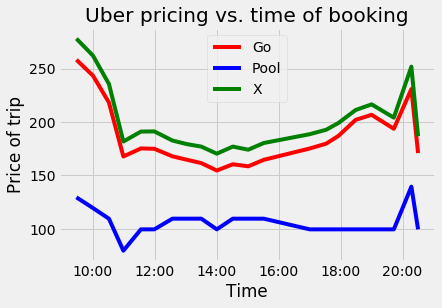

In [107]:
ax = plt.subplot()
plt.plot(date_list, uber_data.column("uberGO"), 'r-', label='Go')
plt.plot(date_list, uber_data.column("uberPOOL"), 'b-', label='Pool')
plt.plot(date_list, uber_data.column("uberX"), 'g-', label='X')
plt.legend()
plt.title("Uber pricing vs. time of booking")
plt.xlabel("Time")
plt.ylabel("Price of trip")
yfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(yfmt)

plt.show()

## findings

Avoid travelling by Uber during peak hours, which consist of the morning (8:30 - 11) and the evening (7:30 - 9) rushes. While I did not capture this specific data point, 9:45 AM has the highest price, followed by 8:30 PM. 

11PM is a nice time to start if I intend on leaving fairly early to teach. Otherwise, 2PM is the best time.

## what's next
The data collection process could have certainly been more rigorous - and possibly automated (I set alarms for myself every half-hour (which I missed at times) and screenshotted the Uber pricing screen). However, I don't think Uber's API allows you to freely access prices.

In terms of the analysis itself, perhaps a comparison between the pricing schemes of Ola and Uber seems promising. I also considered logging more data points across several days and multiple locations (so as to account for variations in pricing due to the availability/non-availability of drivers at a specific location), but the current regimen of logging was drudgerous enough on its own. Still, a neat visualisation with a slider to browse plots for different days of the week would have been sweet!